# Ball Drop Experiment

## Introduction

The objective of this experiment is to investigate the factors influencing the bounce height of balls. Specifically, we examine the impact of ground texture, ball pressure, weight, wind speed, and initial drop height on the bounce height of two types of balls: tennis balls and table tennis balls. Using a quarter fraction  $2^6$ factorial design, we try to study the main effects and potential interactions among these factors while minimizing experimental runs. 

## Data

In [11]:
install.packages("faraway")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [12]:
library(MASS)       
library(car)        
library(ggplot2)
library(dplyr)
library(faraway)


Attaching package: ‘faraway’


The following objects are masked from ‘package:car’:

    logit, vif




In [71]:
data = read.csv("data.csv")
data = data|>
    select(-order)

In [34]:
data$bounce_height = as.integer(data$bounce_height)
data

ground,pressure,weight,wind,height,type,bounce_height
<int>,<int>,<int>,<int>,<int>,<int>,<int>
-1,-1,-1,-1,-1,-1,53
-1,1,-1,-1,1,1,49
-1,-1,1,-1,1,-1,105
-1,1,1,-1,-1,1,16
-1,-1,-1,1,-1,1,27
-1,1,-1,1,1,-1,80
-1,-1,1,1,1,1,47
-1,1,1,1,-1,-1,54
1,-1,-1,-1,1,1,118


## Assumption Check


Call:
lm(formula = bounce_height ~ ground + pressure + weight + wind + 
    height + type + pressure:ground + pressure:height + ground:wind + 
    pressure:weight + pressure:wind + wind:height + weight:wind, 
    data = data)

Residuals:
    1     2     3     4     5     6     7     8     9    10    11    12    13 
-3.25 -2.50  3.25  2.50  3.25  2.50 -3.25 -2.50  2.50  3.25 -2.50 -2.50 -3.25 
   14    15    16 
-3.25  2.50  3.25 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       70.750      2.050  34.510 0.000839 ***
ground            16.875      2.050   8.231 0.014441 *  
pressure          -2.125      2.050  -1.037 0.408852    
weight             2.875      2.050   1.402 0.295882    
wind              -0.375      2.050  -0.183 0.871729    
height            18.875      2.050   9.207 0.011593 *  
type              -5.875      2.050  -2.866 0.103256    
ground:pressure    2.000      2.050   0.976 0.432181    
pressure:height    1.250      2.050  

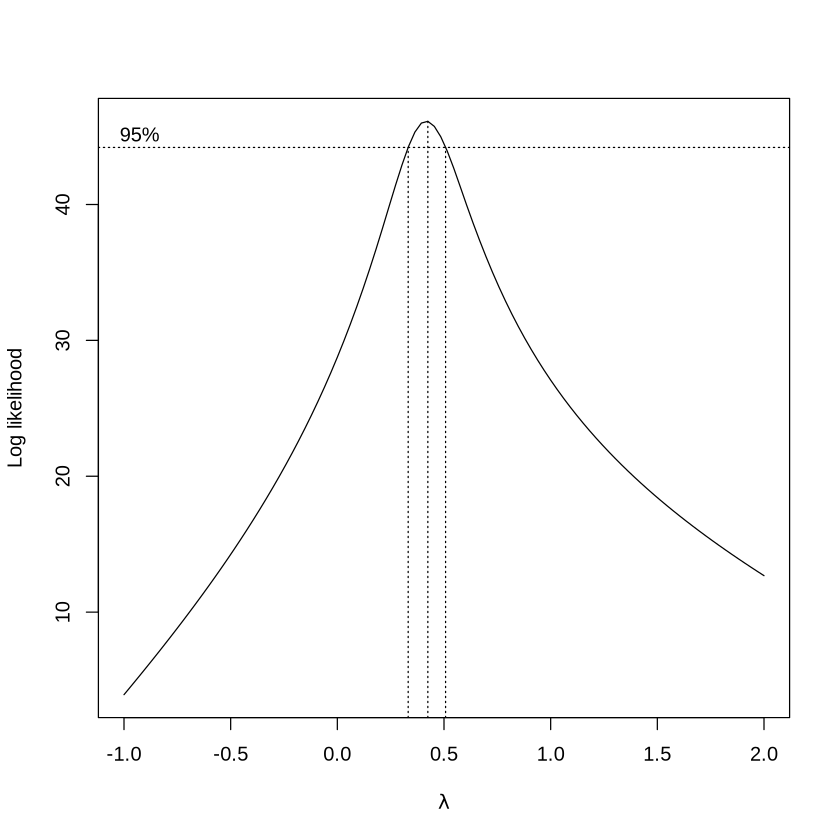

In [4]:
model = lm(bounce_height ~ ground + pressure + weight + wind + height + type + pressure:ground + pressure:height + ground:wind + pressure:weight + pressure:wind + wind:height + weight:wind, data = data)
summary(model)
boxcox_result <- boxcox(model, lambda = seq(-1, 2, 0.1), ylab="Log likelihood")

In [35]:
data= data|>
    mutate(sqrt_bounce_height = sqrt(bounce_height))
model2 = lm(sqrt_bounce_height ~ground + pressure + weight + wind + height + type + pressure:ground + pressure:height + ground:wind + pressure:weight + pressure:wind + wind:height + weight:wind, data = data)
summary(model2)


Call:
lm(formula = sqrt_bounce_height ~ ground + pressure + weight + 
    wind + height + type + pressure:ground + pressure:height + 
    ground:wind + pressure:weight + pressure:wind + wind:height + 
    weight:wind, data = data)

Residuals:
        1         2         3         4         5         6         7         8 
-0.086498  0.009191  0.086498 -0.009191  0.086498 -0.009191 -0.086498  0.009191 
        9        10        11        12        13        14        15        16 
-0.009191  0.086498  0.009191  0.009191 -0.086498 -0.086498 -0.009191  0.086498 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.1915792  0.0434923 188.346 2.82e-05 ***
ground           1.0826281  0.0434923  24.892  0.00161 ** 
pressure        -0.1616784  0.0434923  -3.717  0.06535 .  
weight           0.1201590  0.0434923   2.763  0.10984    
wind             0.0336825  0.0434923   0.774  0.51969    
height           1.1523460  0.0434923  26.495  0.00142 ** 
type

In [60]:
aov.summary = summary(aov(model2))
aov.summary

                Df Sum Sq Mean Sq F value  Pr(>F)   
ground           1 18.753  18.753 619.632 0.00161 **
pressure         1  0.418   0.418  13.819 0.06535 . 
weight           1  0.231   0.231   7.633 0.10984   
wind             1  0.018   0.018   0.600 0.51969   
height           1 21.246  21.246 702.007 0.00142 **
type             1  3.632   3.632 120.015 0.00823 **
ground:pressure  1  0.246   0.246   8.140 0.10403   
pressure:height  1  0.217   0.217   7.156 0.11594   
ground:wind      1  0.051   0.051   1.687 0.32353   
pressure:weight  1  0.000   0.000   0.000 0.99314   
pressure:wind    1 12.097  12.097 399.714 0.00249 **
wind:height      1  1.356   1.356  44.797 0.02160 * 
weight:wind      1  0.041   0.041   1.362 0.36349   
Residuals        2  0.061   0.030                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Confidence Intervals

In [20]:
summary.model2 = summary(model2)
se.estimate = summary.model2$coefficients[1,2]
estimate = summary.model2$coefficients[-1,1]

# 95% confidence interval for the *parameter* effect
ground.ci = estimate["ground"] + c(-1,1)*qt(0.975, df = 2) * se.estimate
height.ci = estimate["height"] + c(-1,1)*qt(0.975, df = 2) * se.estimate
type.ci = estimate["type"] + c(-1,1)*qt(0.975, df = 2) * se.estimate
pw.ci = estimate["pressure:wind"] + c(-1,1)*qt(0.975, df = 2) * se.estimate
wh.ci = estimate["wind:height"] + c(-1,1)*qt(0.975, df = 2) * se.estimate

ground.ci
height.ci
type.ci
pw.ci
wh.ci

[1] 0.8954959 1.2697603

[1] 0.9652138 1.3394783

[1] -0.6635964 -0.2893320

[1] 0.6824029 1.0566674

[1] -0.4782298 -0.1039653

## Half-Normal Plot

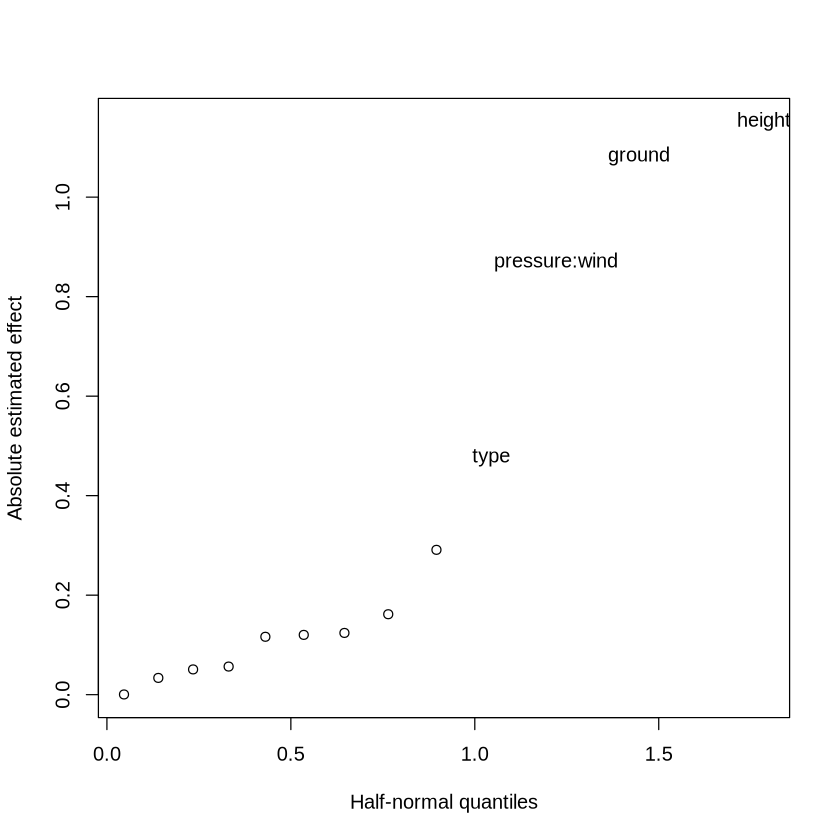

In [13]:
model2.coef <- coefficients(model2)
halfnorm(
  model2.coef[-1],
  ylab = "Absolute estimated effect",
  nlab = 4,
  labs = c(
    "ground", "pressure", "weight", "wind", "height", "type", 
    "pressure:ground", "pressure:height", "ground:wind", 
    "pressure:weight", "pressure:wind", "wind:height", 
    "weight:wind"
  )
)

## Main-Effect and Interaction Plots

### Main-Effects Plot

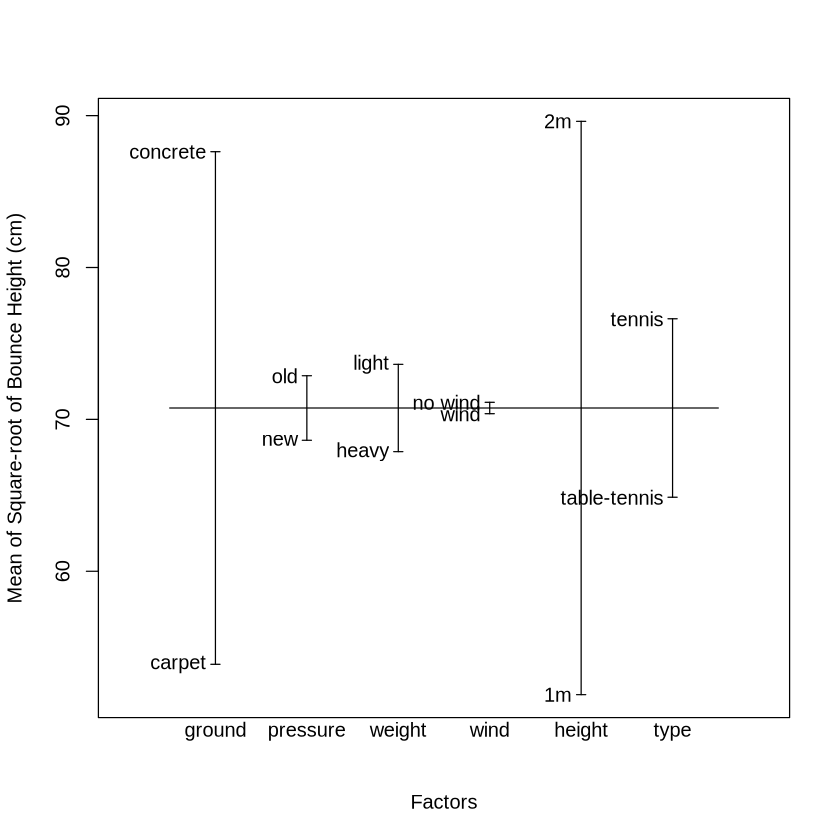

In [38]:
data$ground = factor(data$ground, labels=c("carpet","concrete"))
data$pressure = factor(data$pressure, labels=c("old", "new"))
data$weight = factor(data$weight, labels=c("heavy", "light"))
data$wind = factor(data$wind, labels=c("no wind", "wind"))
data$height = factor(data$height, labels=c("1m", "2m"))
data$type = factor(data$type, labels=c("tennis", "table-tennis"))

plot.design(bounce_height ~ground + pressure + weight + wind + height + type + 
            pressure:ground + pressure:height + ground:wind + pressure:weight + pressure:wind + wind:height + weight:wind,
            ylab = "Mean of Square-root of Bounce Height (cm)",
            data = data)

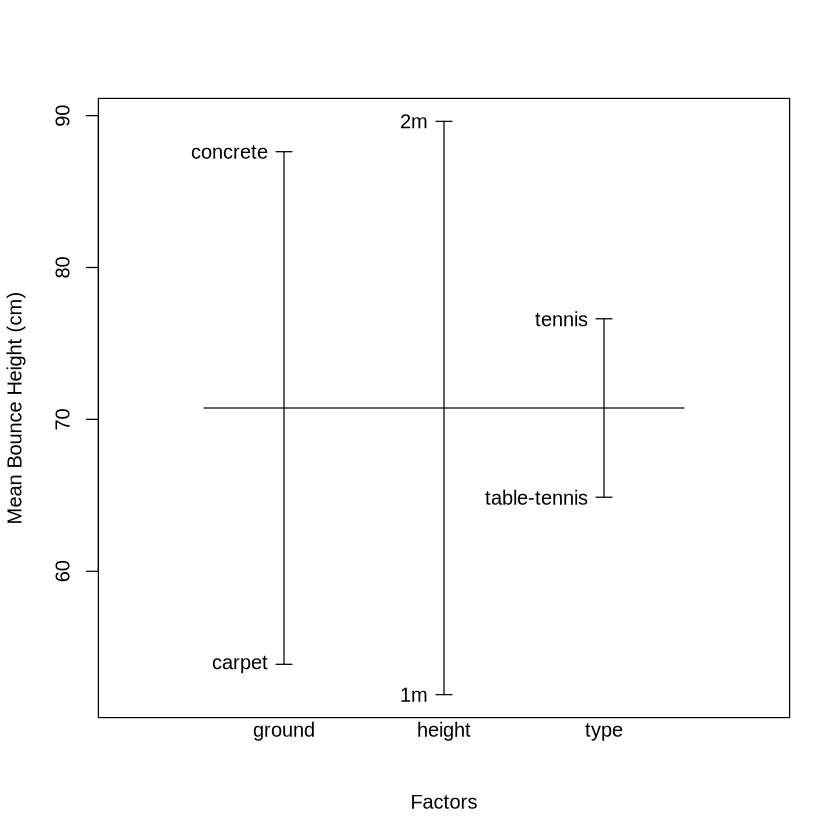

In [47]:
plot.design(bounce_height ~ ground + height + type,
             ylab = "Mean Bounce Height (cm)",
             data = data)

### Interaction Plots

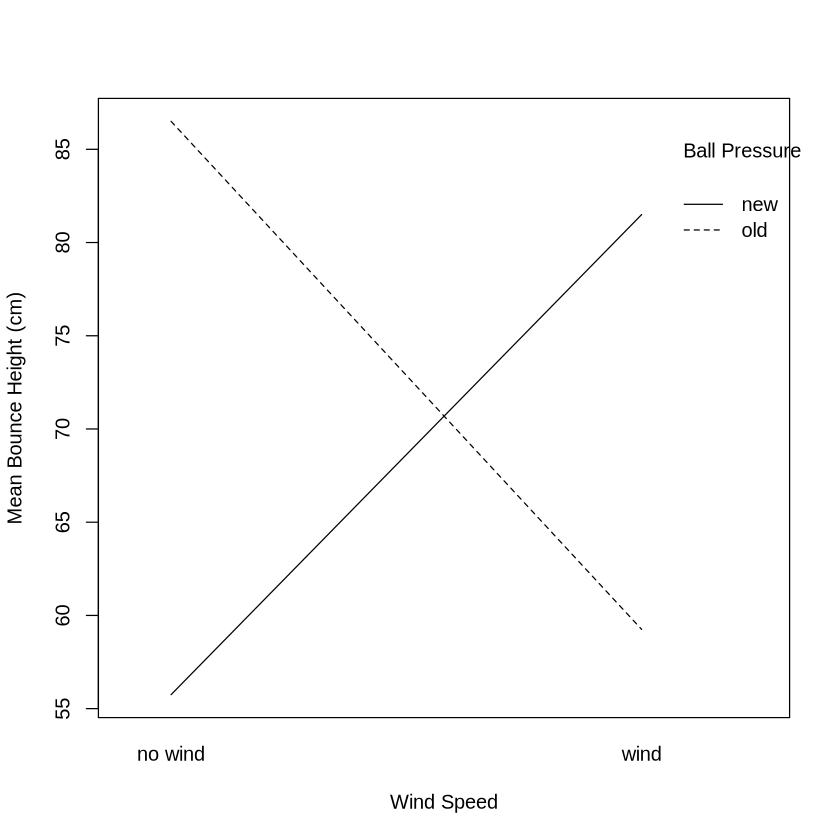

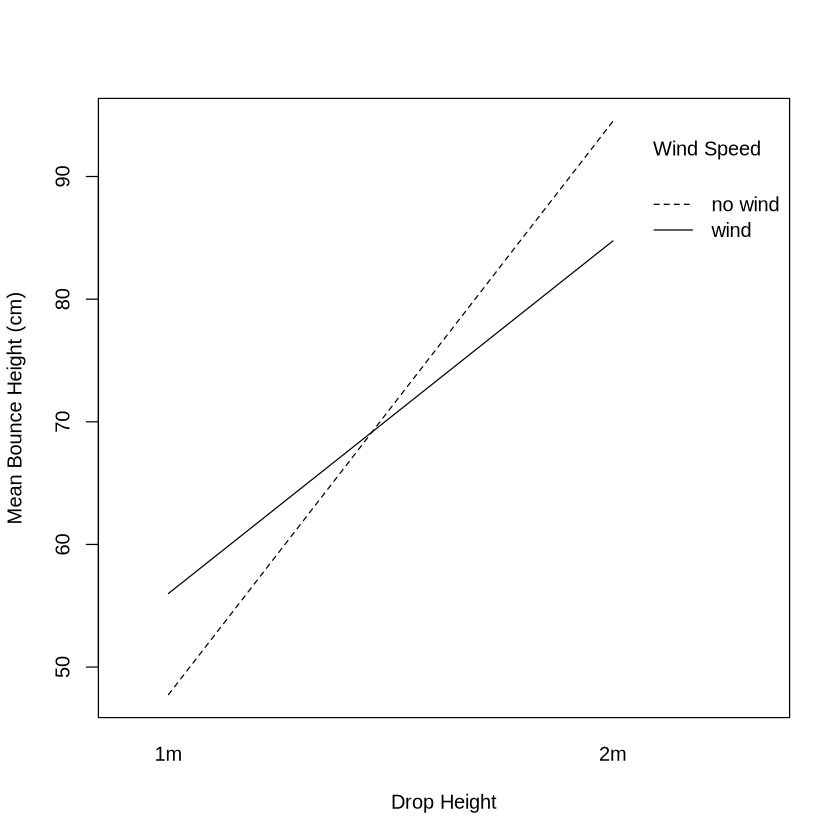

In [57]:
interaction.plot(data$wind, data$pressure, data$bounce_height, 
                 xlab="Wind Speed", ylab="Mean Bounce Height (cm)",trace.label="Ball Pressure")

interaction.plot(data$height, data$wind, data$bounce_height, 
                 xlab="Drop Height", ylab="Mean Bounce Height (cm)",trace.label="Wind Speed")

## Contrast

In [61]:
model.tables(aov(model2), type="mean", se=TRUE, cterms=c("ground", "type", "pressure:wind"))

Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: ground”
Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: type”
Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: pressure, wind”


Tables of means
Grand mean
         
8.191579 

 ground 
ground
   -1     1 
7.109 9.274 

 type 
type
   -1     1 
8.668 7.715 

 pressure:wind 
        wind
pressure -1    1    
      -1 9.189 7.517
      1  7.127 8.933

Standard errors for differences of means
        [,1]
        NULL
replic. NULL

In [42]:
# 95% confidence interval for the *contrast* effect transformed to the original scale
(2*ground.ci)^2
(2*height.ci)^2
(2*type.ci)^2
(2*pw.ci)^2
(2*wh.ci)^2

[1] 3.207652 6.449165

[1] 3.726551 7.176808

[1] 1.761441 0.334852

[1] 1.862695 4.466184

[1] 0.91481482 0.04323516

## Prediction

### No Wind

In [91]:
x = data.frame("ground"=1, "pressure"=-1,"weight"=1,"wind"=-1,height=1,type=-1)
prediction = predict(model2, x, se.fit=TRUE)
prediction

$fit
       1 
11.96454 

$se.fit
[1] 0.1627332

$df
[1] 2

$residual.scale
[1] 0.1739692

In [93]:
mean.ci.nowind = prediction$fit + c(-1,1)*qt(0.975,2)*prediction$se.fit
mean.ci.nowind^2

[1] 126.8857 160.3953

### Wind

In [96]:
x = data.frame("ground"=1, "pressure"=1,"weight"=1,"wind"=1,height=1,type=-1)
prediction2 = predict(model2, x, se.fit=TRUE)
prediction2

$fit
       1 
11.82088 

$se.fit
[1] 0.1627332

$df
[1] 2

$residual.scale
[1] 0.1739692

In [98]:
mean.ci.wind = prediction2$fit + c(-1,1)*qt(0.975,2)*prediction2$se.fit
mean.ci.wind^2

[1] 123.6699 156.7771